In [1]:
import pandas as pd
# disable some warning
import warnings
warnings.simplefilter(action = "ignore")

In [2]:
data = pd.read_csv('perfectly_TV&Music.csv',sep="\t")

In [3]:
data.head(3)

,Unnamed: 0,asin,overall,summary,reviewText,reviewText_new
0,0,0005019281,4.0,good version of a classic,This is a charming version of the classic Dick...,charming version classic dicken's tale. henry ...
1,1,0005019281,3.0,Good but not as moving,It was good but not as emotionally moving as t...,good emotionally moving christmas carol dicken...
2,2,0005019281,3.0,Winkler's Performance was ok at best!,"Don't get me wrong, Winkler is a wonderful cha...","get wrong, winkler wonderful character actor w..."


tf-idf là dạng one-hot vector đã được chuẩn hoá lại. Em có thể quy về dạng. Cho tập dữ liệu D = {xi, yi} với i thuộc [1, m], biết {xi thuộc X là ma trận mxn, m là số mẫu, n là số feature}, ta muốn dự đoán yi.

xi là tf-idf em tìm được cho mỗi statement.

yi là nhãn của sentiment.

Sau đó, áp dụng các thuật toán classification để giải.

# Plot with WordCloud

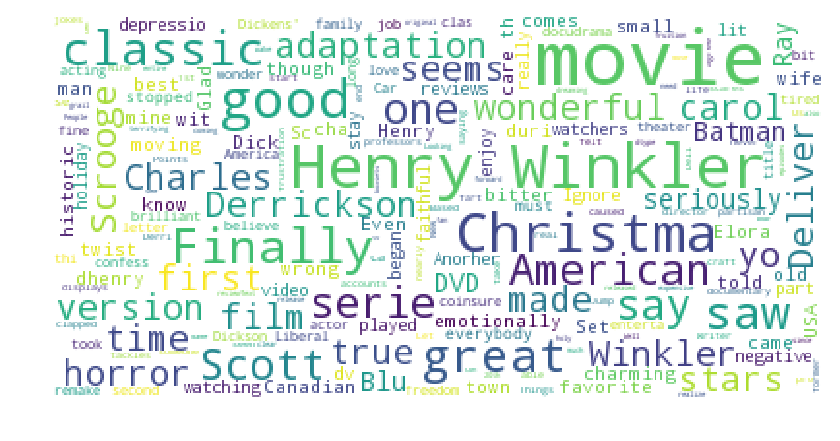

In [4]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

#mpl.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(data['reviewText']))
plt.figure(figsize=(10,9))
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word2.png")

# Using Bag of Words to create features

We are going to do vectorization for processed data:
* Get rid of all reviews's =3.0 to easily distinguish clearer between positive responses and negative responses
* Here, a positive response means its overall >=4.0
* Next, we will classify data by 80/20 of rate
* <strong>CountVectorizer</strong> to incur vector Bag of words
* Finally, we will use <strong>fit_transform()</strong> to convert to term-document matrix to be inputs for clasification functions
* Also, <strong>print_words_frequency()</strong> function to print a list of words frequency


In [5]:
from sklearn.feature_extraction.text import CountVectorizer #Convert a collection of text documents to a matrix of token counts
from sklearn.cross_validation import train_test_split  # split data to train,test parts

def print_words_frequency(train_data_features):
    # Take a look at the words in the vocabulary
    vocab = vectorizer.get_feature_names()
    print ("Words in vocabulary:", vocab)

    # Sum up the counts of each vocabulary word
    dist = np.sum(train_data_features, axis=0)

    # For each, print the vocabulary word and the number of times it
    # appears in the training set
    print ("Words frequency...")
    for tag, count in zip(vocab, dist):
        print(count, tag)

# Ignore all 3* reviews
clean_train_reviews = data[data["overall"] != 3]

# positive sentiment = 4* or 5* reviews
clean_train_reviews["sentiment"] = clean_train_reviews["overall"] >= 4

train, test = train_test_split(clean_train_reviews, test_size=0.2)

print ("Creating the bag of words...\n")
vectorizer = CountVectorizer(analyzer="word",
                             tokenizer=None,
                             preprocessor=None,
                             stop_words=None,
                             max_features=10)

train_text = train["reviewText_new"].values.astype('U')
test_text = test["reviewText_new"].values.astype('U')

# convert data-set to term-document matrix
X_train = vectorizer.fit_transform(train_text).toarray()
y_train = train["sentiment"]

X_test = vectorizer.fit_transform(test_text).toarray()
y_test = test["sentiment"]

print_words_frequency(X_train)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Creating the bag of words...



MemoryError: 

In [40]:
train5

,Unnamed: 0,asin,overall,summary,reviewText,reviewText_new,sentiment
306947,306947,6302309514,5.0,Movies rarely get as moving as this...,An emotional film about a doctor who has a cer...,emotional film doctor certain way thinking pat...,True
900511,900511,B00092ZLS0,4.0,Creepy!!!,This was good...another must see. A good rent...,"good...another must see. good rental. oh gosh,...",True
1655578,1655578,B00DGWZK0Y,5.0,Wonderful! Can't wait!,This is a great Christmas animated feature. Pl...,great christmas animated feature. plus come ad...,True
629385,629385,B00005JND5,5.0,Congratulation's Jamie!,I enjoyed this film immensely and was impresse...,enjoyed film immensely impressed entire produc...,True
910886,910886,B0009PW4D2,5.0,I loved it too.,Thanks A. Gregory for saying how it really is....,thanks a. gregory saying really is. loved movi...,True
193771,193771,1608838137,4.0,The Classes,The most enjoyable thing about Downton Abbey i...,enjoyable thing downton abbey dynamics upstair...,True
92230,92230,0790729695,4.0,A good film gets better,The recent release of the director's cut of Le...,recent release director's cut lethal weapon ad...,True
652392,652392,B00005JPLE,4.0,Reach the stars and your dreams,*No spoilers*Once again we come across another...,*no spoilers*once come across another inspirat...,True
1068698,1068698,B000P5HARG,2.0,Our favorite giant turtle loses his bite,"I'm a big fan of Japan's Gamera movies, even t...","i'm big fan japan's gamera movies, even sillie...",False
1353069,1353069,B003L77GWE,4.0,Liked it,The second season was not a disappointment and...,second season disappointment watch next season...,True


In [39]:
X_train = vectorizer.fit_transform(train5).toarray()
X_train

array([[0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0]], dtype=int64)

In [32]:
print(train_text.shape,test_text.shape)

(1196984,) (299247,)


In [30]:
train_text = train["reviewText_new"].values.astype('U')
test_text = test["reviewText_new"].values.astype('U')

MemoryError: 